# DONNEES DE PANEL

Application : prix du billet d'avion et concentration du marché du transport aérien}

Nous nous plaçons à la fin des années 1990. Il y a encore peu de compagnies d'aviation concurrentes à cette époque. Les autorités de la concurrence souhaitent savoir si le fait d'introduire de la concurrence permettrait de baisser les tarifs pratiqués par les compagnies aériennes. 

Nous disposons des données de 1149 trajets de vol interne aux États-Unis pour les quatre années suivantes : 1997, 1998, 1999, 2000 : 

$id$ : Identifiant du trajet de vol

$annee$ : Année

$tarif$ : Prix moyen du billet aller en dollars

$concen$ : Part de la compagnie la plus importante sur le marché (entre 0 et 1)

$dist$ : Distance du trajet de vol en km

Nous souhaitons savoir si la concentration d'un trajet particulier dans les mains d'une compagnie a une influence sur le prix qu'elle pratique. 

## 1. Structure de l'échantillon

Ouvrir les données **TD8_airfaremodified.dta.dta**.

In [1]:
library(foreign)
ds<-read.dta("TD8_airfaremodified_v12.dta")

Combien a-t-on d'observations au total ?

In [2]:
dim(ds) #4596
4596/4

[1] 4596    7

[1] 1149

Quelle est l'unité individuelle, quelle est l'unité temporelle du panel ? 

A quoi ressemble donc la matrice des données de panel ? 

In [3]:
head(ds)

origin,destin,id,dist,concen,tarif,annee
"AKRON, OH","ATLANTA, GA",1,844.8,0.8386,106,1997
"AKRON, OH","ATLANTA, GA",1,844.8,0.8133,106,1998
"AKRON, OH","ATLANTA, GA",1,844.8,0.8262,113,1999
"AKRON, OH","ATLANTA, GA",1,844.8,0.8612,123,2000
"AKRON, OH","ORLANDO, FL",2,1377.6,0.5798,104,1997
"AKRON, OH","ORLANDO, FL",2,1377.6,0.5817,105,1998


Produire un graphique mettant en relation la variable de concentration du marché et le prix du vol, en utilisant l'option **+ facet_wrap(~...)** pour différencier les 4 années. 

Faire le même graphique sur le sous-échantillon des observations dont la distance de vol est supérieure à 2000 miles. 

Commenter. 

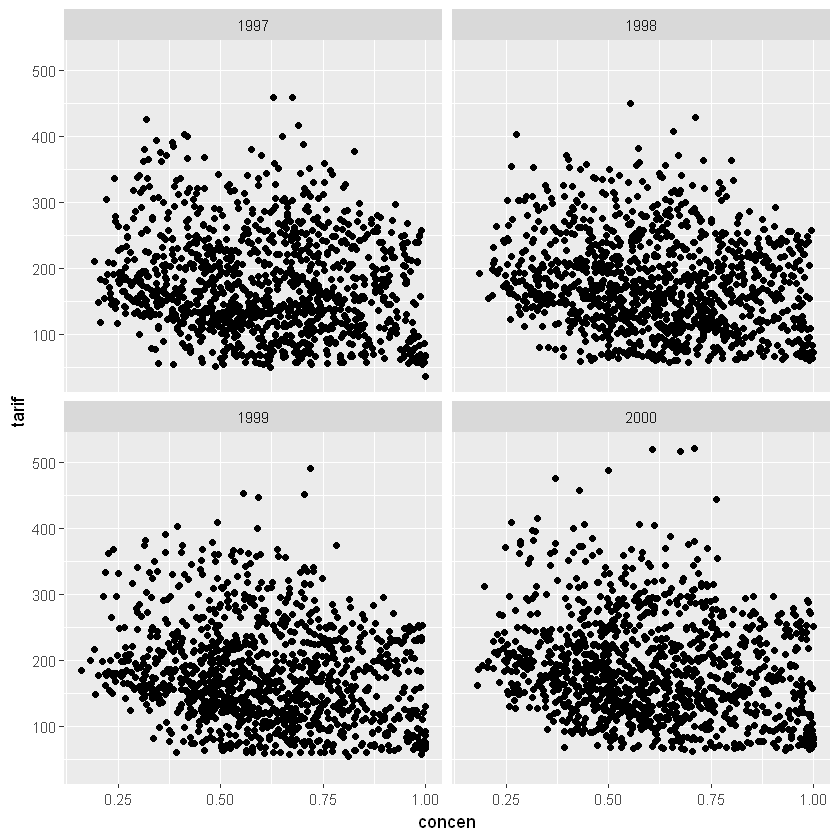

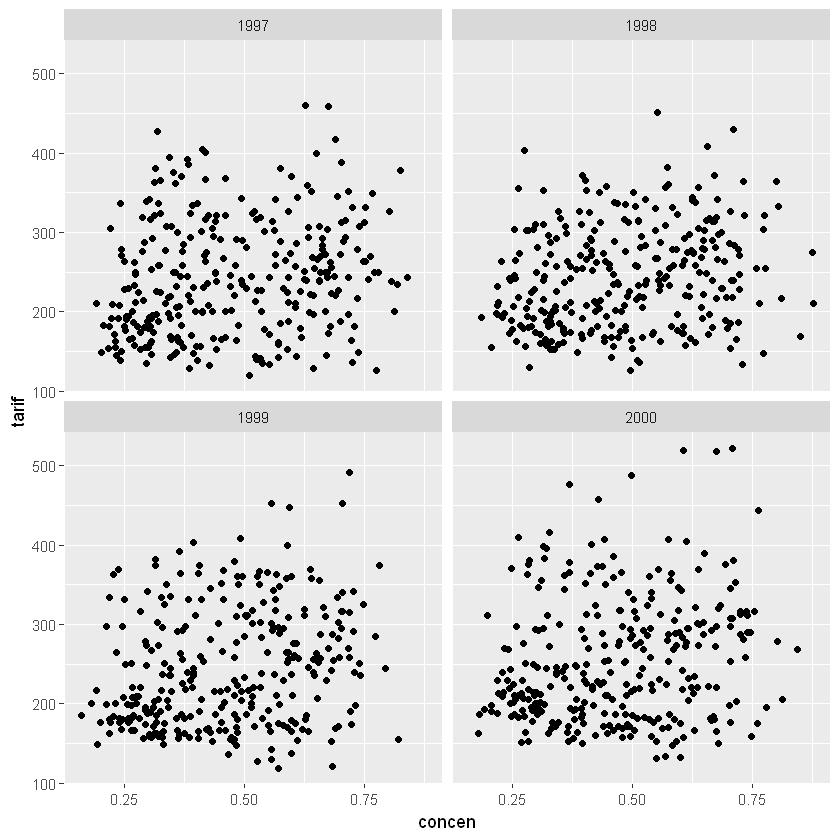

In [4]:
library(ggplot2)
ggplot(ds,aes(x=concen,y=tarif)) + geom_point() + facet_wrap(~annee)
ggplot(ds[ds$dist>2000,],aes(x=concen,y=tarif)) + geom_point() + facet_wrap(~annee)

## 2. Analyse

### 2.1 MCO groupés (pooled OLS)
On souhaite estimer l'effet de la concentration sur le prix, en tenant compte de la distance du vol. 
Quelle est la variable dépendante ? La variable explicative principale ? Quel est le signe attendu du paramètre des différentes variables ? Ecrire l'équation à estimer. 

Estimer ce modèle par MCO. Toutes choses égales par ailleurs, quel est l'effet d'une distance de 100km supplémentaire ? D'une concentration de 10 points plus élevée ?

In [5]:
simple<-lm(tarif~concen+dist, data=ds)
summary(simple)


Call:
lm(formula = tarif ~ concen + dist, data = ds)

Residuals:
    Min      1Q  Median      3Q     Max 
-146.26  -44.08  -11.86   39.11  215.89 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.189416   4.255234   10.86   <2e-16 ***
concen      73.357392   5.064736   14.48   <2e-16 ***
dist         0.055476   0.001016   54.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 57.26 on 4593 degrees of freedom
Multiple R-squared:  0.4155,	Adjusted R-squared:  0.4153 
F-statistic:  1633 on 2 and 4593 DF,  p-value: < 2.2e-16


Un économétricien transformera toujours les données de prix et ici de distance en log. Donner les différentes raisons de ce choix. 

On ajoute donc au dataframe *ds* les données *ldist* et *ltarif* qui seront les données en logarithme de *dist* et *tarif*.

In [6]:
ds$ldist<-log(ds$dist)
#ds$ltarif<-

On estime ensuite le même modèle que précédemment, mais cette fois-ci avec les variables *ldist* et *lconcen*. Interpréter les coefficients.

In [7]:
#pooled<-
#summary(pooled)


Call:
lm(formula = ltarif ~ concen + ldist, data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35809 -0.25985 -0.03736  0.25628  1.16083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.657873   0.076496   21.67   <2e-16 ***
concen      0.316637   0.030370   10.43   <2e-16 ***
ldist       0.452738   0.009048   50.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3425 on 4593 degrees of freedom
Multiple R-squared:  0.3845,	Adjusted R-squared:  0.3842 
F-statistic:  1434 on 2 and 4593 DF,  p-value: < 2.2e-16


Question subsidiaire : comment interpréter le coefficient d'un modèle niveau-log ?

On ajoute des effets fixes temporels. Rappeler la définition. Ecrire l'équation à estimer. 

On estime le modèle par MCO en ajoutant à notre fonction **lm()** précédente la variable "factor(*annee*)". 

a) Pourquoi pas la variable *annee* directement ? 

b) Estimer.

In [8]:
pooled_tfe <- lm(ltarif ~ concen+ldist+factor(annee), data=ds)
summary(pooled_tfe)


Call:
lm(formula = ltarif ~ concen + ldist + factor(annee), data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32066 -0.25931 -0.03519  0.25559  1.10283 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.605579   0.076658  20.945  < 2e-16 ***
concen            0.323896   0.030234  10.713  < 2e-16 ***
ldist             0.453888   0.009001  50.427  < 2e-16 ***
factor(annee)1998 0.021448   0.014211   1.509  0.13130    
factor(annee)1999 0.037572   0.014210   2.644  0.00822 ** 
factor(annee)2000 0.099473   0.014212   6.999 2.95e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3406 on 4590 degrees of freedom
Multiple R-squared:  0.3917,	Adjusted R-squared:  0.391 
F-statistic:   591 on 5 and 4590 DF,  p-value: < 2.2e-16


c) Interpréter les effets fixes temporels. 

Quels sont les deux problèmes posés par cette méthode d'estimation ? 

### 2.2 Modèles avec effets fixes individuels

Pour éviter ces deux problèmes potentiels, nous profitons de la structure de panel des données et nous estimons le modèle de régression avec effets fixes grâce à l'estimateur within. 

*Indice: on a besoin du package **plm** et de la fonction **plm(y~x, data=..., index=c("id","time", model="within")**.*

In [11]:
install.packages("plm")
library(plm)
fixed <- plm(ltarif ~ concen+ldist+factor(annee), data=ds, index=c("id", "annee"), model="within")
summary(fixed)

package 'plm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmartinoty\AppData\Local\Temp\Rtmp0SaJbe\downloaded_packages


Oneway (individual) effect Within Model

Call:
plm(formula = ltarif ~ concen + ldist + factor(annee), data = ds, 
    model = "within", index = c("id", "annee"))

Balanced Panel: n = 1149, T = 4, N = 4596

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.8812810 -0.0397341  0.0023906  0.0436350  0.9188103 

Coefficients:
                   Estimate Std. Error t-value  Pr(>|t|)    
concen            0.1688590  0.0294101  5.7415 1.020e-08 ***
factor(annee)1998 0.0228328  0.0044515  5.1292 3.071e-07 ***
factor(annee)1999 0.0363819  0.0044495  8.1766 4.061e-16 ***
factor(annee)2000 0.0977716  0.0044555 21.9441 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    45.169
Residual Sum of Squares: 39.06
R-Squared:      0.13524
Adj. R-Squared: -0.1541
F-statistic: 134.611 on 4 and 3443 DF, p-value: < 2.22e-16

A quoi sert la commande index=c("id", "time") ? Que signifie ``model="within"'' ?

Quel est l'avantage de cette méthode d'estimation ?

Pourquoi ne peut-on pas utiliser la variable $dist$ ?

Interpréter le paramètre de $concen$.

On souhaite vérifier que l'estimateur within donne bien le même coefficient que l'**estimateur MCO qui inclut des effets fixes individuels et temporels**. Pour cela on estime par MCO le même modèle avec effets fixes temporels et individuels. 

Estimer et commenter.

In [12]:
pooled_tfe_ife <- lm(ltarif ~ concen+ldist+factor(annee)+factor(id), data=ds)
summary(pooled_tfe_ife)


Call:
lm(formula = ltarif ~ concen + ldist + factor(annee) + factor(id), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88128 -0.03973  0.00239  0.04363  0.91881 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.7467405  1.0876121   0.687 0.492389    
concen             0.1688590  0.0294101   5.742 1.02e-08 ***
ldist              0.5623389  0.1555634   3.615 0.000305 ***
factor(annee)1998  0.0228328  0.0044515   5.129 3.07e-07 ***
factor(annee)1999  0.0363819  0.0044495   8.177 4.06e-16 ***
factor(annee)2000  0.0977716  0.0044555  21.944  < 2e-16 ***
factor(id)2       -0.2275199  0.0758138  -3.001 0.002710 ** 
factor(id)3        0.4005965  0.0748676   5.351 9.33e-08 ***
factor(id)4        0.5533816  0.0670399   8.255  < 2e-16 ***
factor(id)5       -0.3305055  0.0978139  -3.379 0.000736 ***
factor(id)6        0.7702682  0.1335199   5.769 8.68e-09 ***
factor(id)7       

De même, on souhaite vérifier que la transformation des données par soustraction de la moyenne individuelle donne bien le même coefficient. Grâce au code ci-dessous on crée la transformation de ltarif : 

In [13]:
ds$mean_ltarif <- ave(ds$ltarif, ds$id)
ds$demeaned_ltarif <- ds$ltarif-ds$mean_ltarif

a) Faire de même pour concen. 

b) Estimer par MCO la régression de *demeaned_ltarif* sur *demeaned_lconcen* et les effets fixes temporels *factor(annee)*. 

In [14]:
#ds$mean_concen <- 
#ds$demeaned_concen <-

pooled_demean <- lm(demeaned_ltarif ~ demeaned_concen + factor(annee), data=ds)
summary(pooled_demean)


Call:
lm(formula = demeaned_ltarif ~ demeaned_concen + factor(annee), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88128 -0.03973  0.00239  0.04363  0.91881 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.039247   0.002722 -14.419  < 2e-16 ***
demeaned_concen    0.168859   0.025469   6.630 3.74e-11 ***
factor(annee)1998  0.022833   0.003855   5.923 3.39e-09 ***
factor(annee)1999  0.036382   0.003853   9.442  < 2e-16 ***
factor(annee)2000  0.097772   0.003858  25.340  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09224 on 4591 degrees of freedom
Multiple R-squared:  0.1352,	Adjusted R-squared:  0.1345 
F-statistic: 179.5 on 4 and 4591 DF,  p-value: < 2.2e-16


## 3. Choix de la méthode d'estimation

On sait qu'il existe un autre type d'estimateur pour les données de panel : les **effets aléatoires**. 

L'**avantage des effets aléatoires sur les MCO groupés** est que l'autocorrélation intraindividuelle des erreurs est modélisée donc prise en compte. 

Quel est l'avantage des effets aléatoires sur les effets fixes (within) ? L'inconvénient ?

On estime le modèle avec effets aléatoires. Estimer et interpréter. 

*Indice: on utilise la même fonction **plm(y~x, data=..., index=c("id","time", model="...")**.*, mais avec le modèle **random** au lieu de **within**.

In [15]:
#random <- 
#summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = ltarif ~ concen + ldist + factor(annee), data = ds, 
    model = "random", index = c("id", "annee"))

Balanced Panel: n = 1149, T = 4, N = 4596

Effects:
                  var std.dev share
idiosyncratic 0.01134 0.10651 0.098
individual    0.10470 0.32357 0.902
theta: 0.8376

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.8234303 -0.0627987 -0.0051945  0.0647800  0.8655053 

Coefficients:
                   Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)       1.8203271  0.1154451 15.7679 < 2.2e-16 ***
concen            0.2010512  0.0265472  7.5734 3.637e-14 ***
ldist             0.4344228  0.0152739 28.4421 < 2.2e-16 ***
factor(annee)1998 0.0225452  0.0044527  5.0632 4.122e-07 ***
factor(annee)1999 0.0366289  0.0044511  8.2292 < 2.2e-16 ***
factor(annee)2000 0.0981248  0.0044559 22.0211 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

Le chercheur veut faire un choix entre effets fixes et aléatoires. Quel estimateur va-t-il choisir ?

*Indice : il compare les deux modèles avec un test de Hausman :* **phtest(model1,model2)** 


	Hausman Test

data:  ltarif ~ concen + ldist + factor(annee)
chisq = 6.469, df = 4, p-value = 0.1668
alternative hypothesis: one model is inconsistent
